#Estimación del número pi



##A) Analíticamente
Tenemos un estimador
$$\bar \pi = \frac{4n}{N}$$
Consideramos la variable
$$X_i\begin{cases}
1 \ &\text{si el dardo cae dentro del punto } \ (p) \\
0 \ &\text{si cae fuera } \ (1-p) \\
\end{cases}$$

Por la ley de los grandes números, consideramos
$$z=4\frac{X_1+X_2+...+X_N}{N}$$
Y calculamos el valor esperado y la esperanza
1. $E[X_i]=1p+0(1-p)=p$
$$E[z]=\frac{4}{N}(E[X_1]+...+E[X_N])$$
$$E[z]=\frac{4}{N}*Np=4p$$
$$E[z]=4p$$
\
2. $V[X_i]=E[X_i^2]-E[X_i]^2=(1^2p+0^2(1-p))-p^2=p-p^2=p(1-p)$
$$V[z]=\frac{16}{N^2}(V[X_1]+...+V[X_N])$$
$$V[z]=\frac{16}{N^2}*Np(1-p)$$
$$V[z]=\frac{16p(1-p)}{N}$$


Ahora podemos usar la desigualdad Chebyshev
$$P(|z_N-\pi|\geq ϵ)\leq \frac{V[z_N]}{ϵ^2}$$
$$P(|z_N-\pi|\geq ϵ)\leq \frac{16p(1-p)}{Nϵ^2}$$
Luego, dado un valor de $ϵ$ podemos calcular el valor de N

##Ejemplo
¿Cuántos dardos hay que lanzar para que la probilidad de cometer un error mayor o igual a 0.1 sea menor que 0.01?
###1. Suponfamos que sabemos $p=\frac{pi}{4}$
$ϵ=0.1$ \
$P(|z_N-\pi|\geq ϵ)=0.01$
$$N=\frac{16p(1-p)}{P(|z_N-\pi|\geq ϵ)*ϵ^2}$$
\
$$N=\frac{16\frac{\pi}{4}(1-\frac{\pi}{4})}{0.01*(0.1)^2}\approx 26968$$
###2. Si no conocemos p
Sí sabemos $0<p<1$. Veamos cómo es $p(1-p)$

Calcular puntos extremos utilizando el criterio de la primera derivada \
Si
$$f(x)=x(1-x)$$
$f^{´}=1-2x$ \
Encontramos los puntos críticos \
$f^{´}=0$
$$1-2x=0$$
$$x=\frac{1}{2}$$

Para $f^{´}>0$
$$1-2x>0$$
$$x<\frac{1}{2}$$
Para $f^{´}<0$
$$x>\frac{1}{2}$$
Combinamos los intervalos
$$-∞<x<\frac{1}{2},\ x=\frac{1}{2}, \frac{1}{2}<x<∞$$
Resumen del comportamiento de los intervalos \
Creciente $-∞<x<\frac{1}{2}$ \
Decreciente $\frac{1}{2}<x<∞$ \
Sustituimos en $x(1-p)$
$$\frac{1}{2}(1-\frac{1}{2})=\frac{1}{4}$$
$$Máximo (\frac{1}{2},\frac{1}{4})$$

In [4]:
#Importamos las librerías a ocupar
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

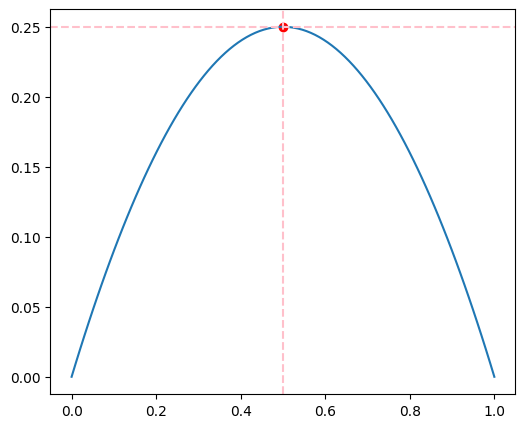

In [9]:
x=np.linspace(0,1,100) #rango en x de [0,1]
y=x*(1-x) #función f(x)
x_c=0.5 #punto crítico

y_c=0.25 #valor de la función en el punto crítico
plt.figure(figsize=(6,5)) #Crear figura
plt.plot(x,y) #Graficar
plt.axvline(x_c,color="pink", linestyle="--")
plt.axhline(y_c,color="pink", linestyle="--")
plt.scatter(x_c,y_c,color="red") #Graficar punto crítico
plt.show()

Esto significa que
$$p(1-p)\leq \frac{1}{4}$$
Volvemos a calcular
$$N\leq \frac{16(\frac{1}{4})}{0.01(0.1^2)}$$
$$N\leq 40000$$
\
La primera $N$ que se obtuvo es una igualdad y la segunda una desigualdad, por eso está tan distanciadas ambas cantidades.

##B)Simulación
Tenemos la función
$$y=\sqrt {1-x^2}$$
que es una cuarta parte de un circulo de radio $1$

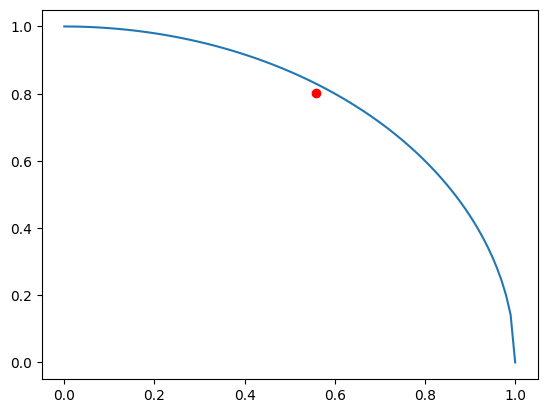

In [11]:
x=np.linspace(0,1,100)
u_1,u_2=np.random.rand(2)
plt.plot(x,np.sqrt(1-x**2))
plt.scatter(u_1,u_2,color="red")
plt.show()

In [50]:
def estimación(n): #ESta función retorna varias listas
 lista1=[] #Estimación de pi
 x_1=[] #Valores para x,y en caso de éxito
 y_1=[]
 x_2=[] #Valores para x,y en caso contrario
 y_2=[]
 éxitos=0 #contador para el número de éxitos
 for i in range(n):
  u_1,u_2=np.random.rand(2) #Genera dos valores aleatorios entre 0 y 1
  if u_2<=np.sqrt(1-u_1**2):
   éxitos+=1 #éxito
   x_1.append(u_1)
   y_1.append(u_2)
  else:
   x_2.append(u_1)
   y_2.append(u_2)
  prob=éxitos/(i+1) #probabilidad de pi/4
  lista1.append(4*prob)
 return lista1,x_1,y_1,x_2,y_2

In [56]:
G,x_1,y_1,x_2,y_2=estimación(1000)

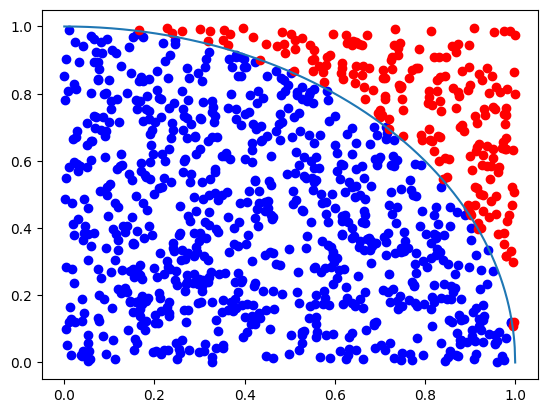

In [57]:
x=np.linspace(0,1,1000) #Rango del eje de las x
plt.plot(x,np.sqrt(1-x**2))
plt.scatter(x_1,y_1,color="blue") #Éxitos
plt.scatter(x_2,y_2,color="r")
plt.show()

In [58]:
media=np.mean(G) #Calcula la media
print(media)

3.1674880737504107


In [59]:
desve=np.std(G) #Calcula la desviación estándar
print(desve)

0.16182558606293002


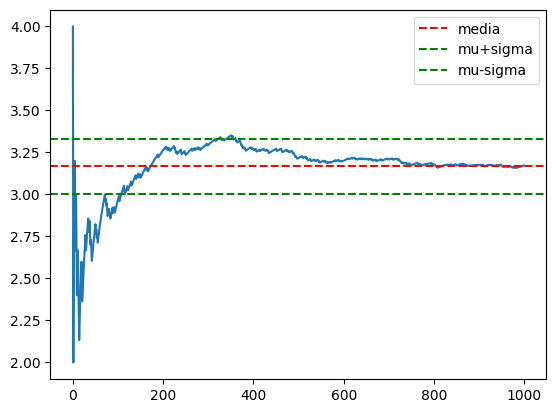

In [60]:
plt.plot(G)
plt.axhline(media, color='r', linestyle='--', label='media') #Grafica una linea vertical en la media
plt.axhline(media + desve, color='g', linestyle='--', label="mu+sigma") #media+desviación estándar
plt.axhline(media - desve, color='g', linestyle='--', label="mu-sigma") #media-desviación estándar

plt.legend() #Mostrar leyenda
plt.show()

Se ve que una muestra de tamaño $N=500$ da un resultado aceptable
\
Para modificar la función y convertirla en una *corrida* de la simulación fijamos N=500 y de la lista, tomamos el último dato, así M veces

In [65]:
def simulación(M): #Esta función retorna la simulación de la estimación de pi
 r=[]
 for i in range(M):
  R,a,b,c,d=estimación(500) #fijamos N=500
  r.append(R[-1])
 return r

In [72]:
S=simulación(4000) #Realizamos la simulación n veces

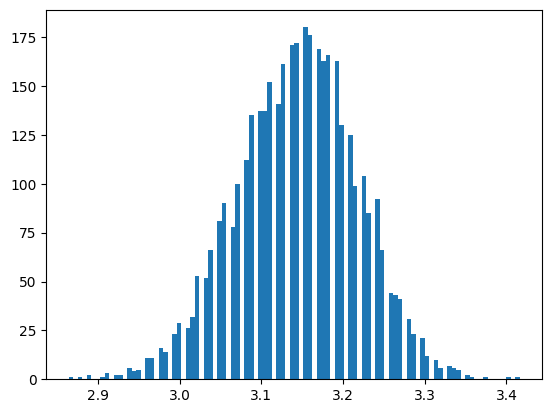

In [83]:
plt.hist(S, bins=100) #Histograma que muestra la distribución que toma
                      #los datos de la simulación
plt.show()

In [81]:
P=media-np.pi #Calculamos la probabilidad de cometer un error
              #mayor o igual que épsilon
print(P)

0.025895420160617633


###¿Qué valor de N?
$ϵ$ es el error y la desviación estándar. Entonces, de la desigualdad Chebyshev
$$P(|z_N-\pi|\geq ϵ)\leq \frac{V[z_N]}{ϵ^2}$$
$$N=\frac{16p(1-p)}{P(|z_N-\pi|\geq ϵ)*ϵ^2}$$

In [82]:
N_0=16*(desve**2)/(P*(desve**2))
print("N = ", round(N_0))

N =  618
